## Imports

In [ ]:
pip install pyccel

     |████████████████████████████████| 350 kB 4.6 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [ ]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx-1): 
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
    return 0

## Numba accelerator

In [ ]:
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx-1): 
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
    return 0

## Pyccel accelerator

In [ ]:
#add the pyccel decorator to accelerate code
def solve_1d_diff_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float', nu:'float'):
    
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx-1): 
            u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

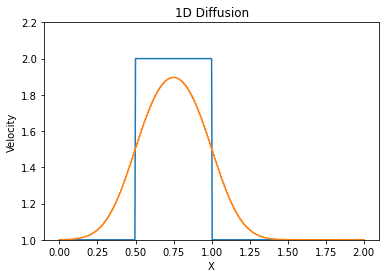

In [ ]:
nx = 501
dx = 2 / (nx - 1)
nt = 1500    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 

## Call Funtions

### Pure function

In [ ]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

1 loop, best of 5: 971 ms per loop


### Function with numba accelerator

In [ ]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

The slowest run took 3206.45 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 446 µs per loop


### Function with pyccel accelerator

In [ ]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [ ]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

The slowest run took 13.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 1.04 ms per loop
